# Smoking: Good or Bad? 

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
df = pd.read_csv("data/smoking.csv")
df.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


# Step 0: Data Preprocessing

Let's make sure that our dataset is clean before we analyse.

TODO: create a new dataframe with columns `is_smoker` and `is_alive` containing `int` or `bool` values.
We do this because they make our calculations easier later on when we will perform calculations (aggregate) over them.

In [15]:
def clean_dataframe(dataf):
    
    clean_df = (dataf
                .assign(is_smoker = lambda d: d['smoker'] == 'Yes',
                        is_alive = lambda d: d['outcome'] == 'Alive')
               ) 
    
    # Create column containing boolean that indicates True for smoking person and False for non-smoking person
    #dataf['is_smoker'] = dataf['smoker'] == 'Yes'
    # Create column containing boolean that indicated True for the persons that are still alive after 20 years and False for those who have died.
    #dataf['is_alive'] = dataf['outcome'] == 'Alive'
    
    return clean_df

clean_df = df.pipe(clean_dataframe)
clean_df.head()

,outcome,smoker,age,is_smoker,is_alive
0,Alive,Yes,23,True,True
1,Alive,Yes,18,True,True
2,Dead,Yes,71,True,False
3,Alive,No,67,False,True
4,Alive,No,64,False,True


# Question 1: what is the probability to live after 20 years, for smokers and non-smokers?

Now that the dataset is clean, the analysis can begin!

In [16]:
def calc_prob_to_live(dataf):
    ## TODO: Calculate the probability to live for smokers and non-smokers.
    ## You can use the indicator columns created above to perform math (a np.mean for each group should work wonders)
    agg_dataf = (dataf
                 .groupby('is_smoker')
                 .agg(prob_to_live_in_20_years=('is_alive', np.mean))
                )
     
    return agg_dataf

prob_to_live_df = clean_df.pipe(calc_prob_to_live)
prob_to_live_df.head()

,prob_to_live_in_20_years
is_smoker,
False,0.685792
True,0.761168


In [6]:
#df.groupby('is_smoker').mean()

---

# Question 2: What? Why? 

Let's see if we can explain why, in our analysis above, smokers seem to have a larger survival rate than non-smokers 

### Effect of Age 

It might be that your age actually has a very large effect on the probability that you will be alive in 20 years or not. Lets quantify that. 

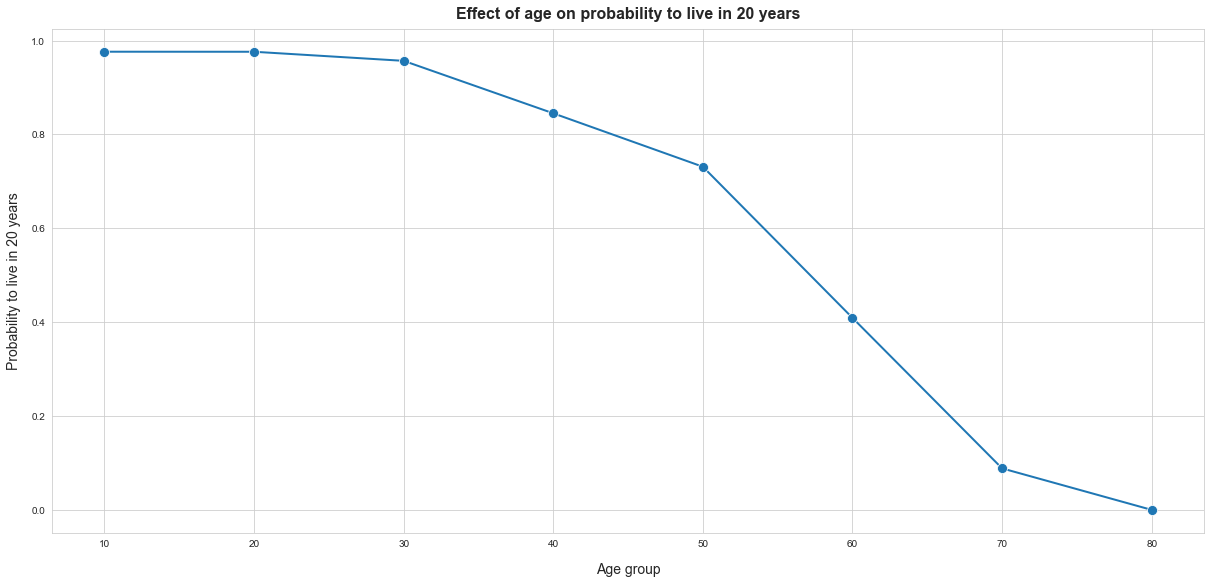

In [17]:
def calc_effect_of_age(dataf):
    # TODO: Transform the data here in such a way that we can plot
    # the effect of age on the probability to live easily.
    # I recommend to bin/group the age column per 10 years, 
    # so that you have more values for each age group.  
    agg_dataf = (dataf
                 .groupby('age')
                 .agg(prob_to_live_in_20_years=('is_alive', np.mean))
                 .assign(age_group=lambda d: np.floor(d.index / 10) * 10)
                 .set_index('age_group')
                )
    
    return agg_dataf

age_effect_df = clean_df.pipe(calc_effect_of_age)

# TODO: Plot the probability to live over the age in a linechart
# y axis: probability to live
# x axis: age (bundled in 'bins' of 10 years)
sns.set_style('whitegrid')

fig = plt.figure(figsize=(16,7))
ax1 = fig.add_axes([0,0,1,1])

sns.lineplot(x=age_effect_df.index, y='prob_to_live_in_20_years', 
             data=age_effect_df, 
             ax=ax1, 
             ci=None, 
             marker='o', 
             lw=2, 
             ms=10);

ax1.set_title('Effect of age on probability to live in 20 years',{'fontsize':16, 'fontweight':'bold'}, pad=10)
ax1.set_ylabel('Probability to live in 20 years',{'fontsize':14}, labelpad=10)
ax1.set_xlabel('Age group',{'fontsize':14}, labelpad=14);

---

# Question 3: How does this age effect quantify for smokers and non-smokers?

In our answer on question two, we can see that the probability to live in 20 years decreases once you gets older. That makes sense. 

But how does that differ for smokers and non-smokers?

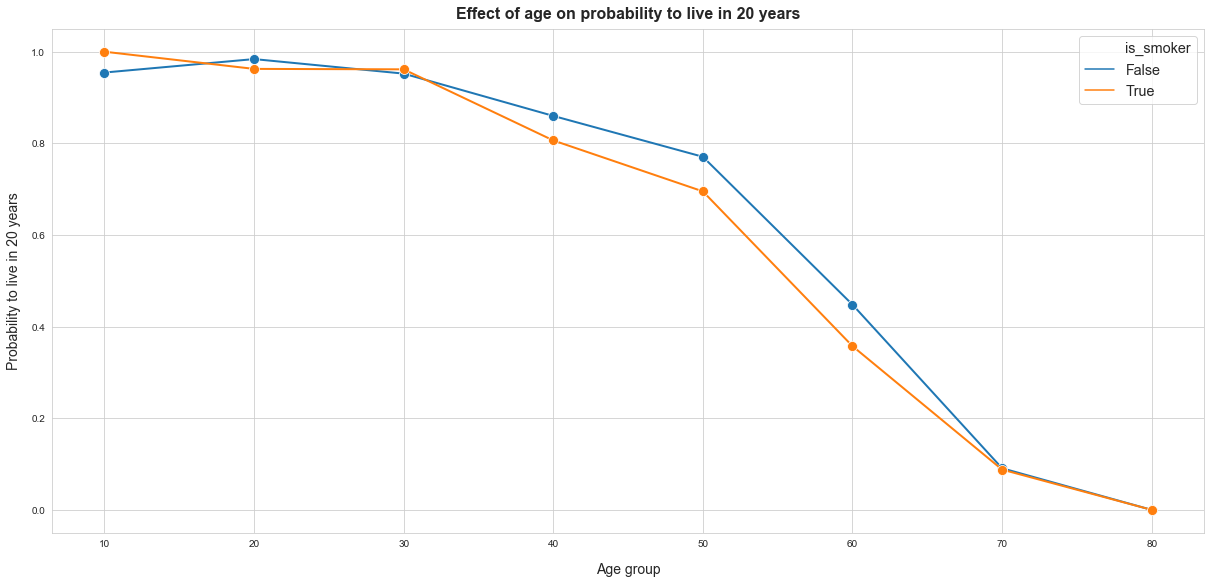

In [29]:
def calc_effect_of_age2(dataf):
    # TODO: Transform the data here in such a way that we can plot
    # the effect of age on the probability to live easily.
    # This time, let's make a line chart for both the smokers and the non-smokers
    # I recommend to bin/group the age column per 10 years, 
    # so that you have more values for each age group.  
    agg_dataf = (dataf
                 .groupby(['age', 'is_smoker'])
                 .agg(prob_to_live_in_20_years=('is_alive', np.mean))
                 .reset_index()
                 .assign(age_group=(lambda d: np.floor(d['age'] / 10) * 10))
                )
    
    return agg_dataf
    
age_effect_smoke_vs_nonsmoke = clean_df.pipe(calc_effect_of_age2)

# TODO: Plot the probability to live over the age in a linechart
# y axis: probability to live
# x axis: age (bundled in 'bins' of 10 years)
# lines: 1 for smokers, 1 for non-smokers
fig = plt.figure(figsize=(16,7))
ax2 = fig.add_axes([0,0,1,1])

sns.lineplot(x='age_group', y='prob_to_live_in_20_years', hue='is_smoker', 
             data=age_effect_smoke_vs_nonsmoke, 
             ax=ax2, ci=None, marker='o', lw=2, ms=10);

ax2.set_title('Effect of age on probability to live in 20 years',{'fontsize':16, 'fontweight':'bold'}, pad=10)
ax2.set_ylabel('Probability to live in 20 years',{'fontsize':14}, labelpad=10)
ax2.set_xlabel('Age group',{'fontsize':14}, labelpad=14)
ax2.legend(fontsize='x-large');

---

# Question 4: What is the benefit of not smoking for different age groups?
i.e.: 
 - What is the probability to live for smokers for different age groups (e.g. 20s, 30s, ... 80s)
   - you can obtain this data from question 4
 - What is the probability to live for non-smokers for different age groups (e.g. 20s, 30s, ... 80s)
   - you can obtain this data from question 4
 - What is the difference in this probabilty for different age groups (e.g. 20s, 30s, ... 80s)
   - **TODO: calculate this**

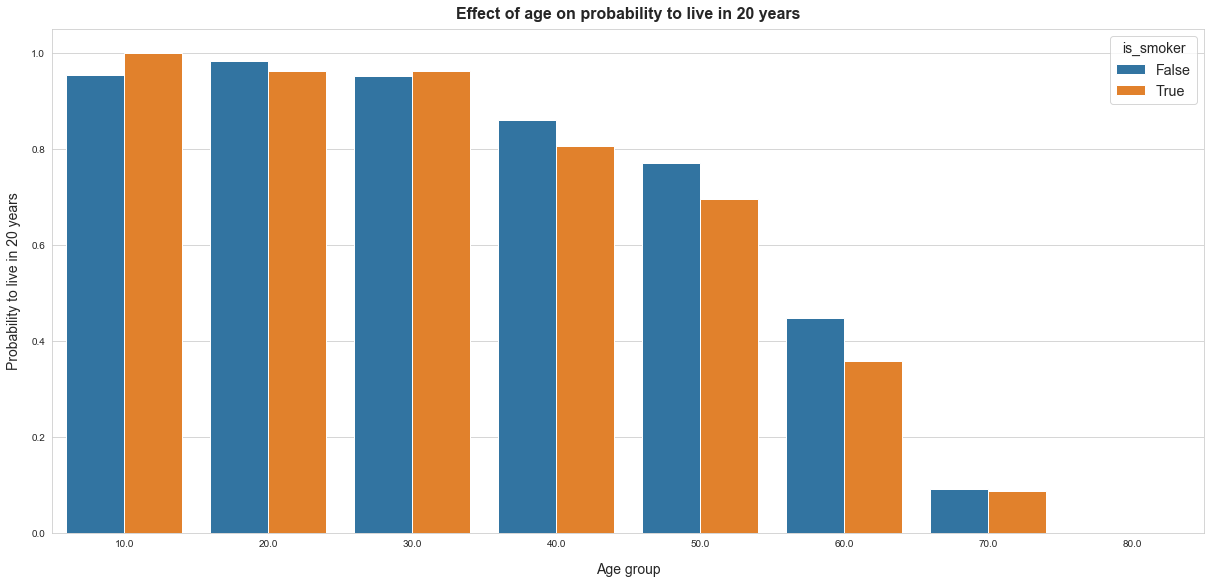

In [30]:
fig = plt.figure(figsize=(16,7))
ax3 = fig.add_axes([0,0,1,1])

sns.barplot(x='age_group', y='prob_to_live_in_20_years', 
            hue='is_smoker', 
            data=age_effect_smoke_vs_nonsmoke, 
            ax=ax3, 
            ci=None)

ax3.set_title('Effect of age on probability to live in 20 years',{'fontsize':16, 'fontweight':'bold'}, pad=10)
ax3.set_ylabel('Probability to live in 20 years',{'fontsize':14}, labelpad=10)
ax3.set_xlabel('Age group',{'fontsize':14}, labelpad=14);
ax3.legend(fontsize='x-large', title='is_smoker', title_fontsize=14);

In [37]:
def calc_effect_smoke_vs_nonsmoke_per_age(dataf):
    agg_dataf = (dataf
                .pivot_table(index='age_group', columns='is_smoker', values='prob_to_live_in_20_years')
                )
    
    agg_dataf['prob_difference'] = agg_dataf[True] - agg_dataf[False]
    
    #agg_dataf['prob_difference'] = agg_dataf.loc[:,True].values - agg_dataf.loc[:,False].values
                                        
       
    return agg_dataf
                                                                                    
         
age_effect_smoke_vs_nonsmoke_age_group = age_effect_smoke_vs_nonsmoke.pipe(calc_effect_smoke_vs_nonsmoke_per_age)

In [38]:
age_effect_smoke_vs_nonsmoke_age_group

is_smoker,False,True,prob_difference
age_group,,,
10.0,0.954545,1.000000,0.045455
20.0,0.983889,0.962500,-0.021389
30.0,0.952189,0.961528,0.009339
40.0,0.859881,0.806364,-0.053517
50.0,0.770660,0.695155,-0.075505
60.0,0.447939,0.357404,-0.090535
70.0,0.090877,0.087963,-0.002914
80.0,0.000000,0.000000,0.000000


---

# Conclusion: Is smoking good or bad for your probability to live in 20 years??

In [ ]:
# TODO Explain in 2 or three sentences
# Depending on your current age, smoking will impact the probability to live 20 years from now.
# From age 40 and older we can identify a lower probabiity to live in 20 years.
# From your 10s to your 30s this effect is lower.

## Discussion: What things should/could we take into account when extending this analysis? 

Name at least 2 things

In [ ]:
# Take into account the level of obesity
# Take into account the level of sportivity